In [36]:
import xarray as xr 
import numpy as np
from scipy.ndimage import label, center_of_mass
import matplotlib.pyplot as plt
%matplotlib inline
hologram = "/glade/work/ggantos/holodec-ml/scripts/ggantos/holo0.nc"


In [2]:
holo_ds = xr.open_dataset(hologram)

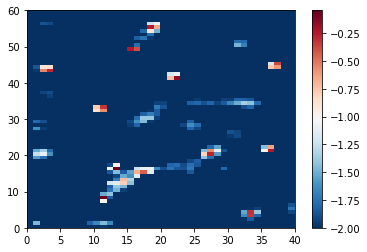

In [18]:
plt.figure(figsize=(6, 4))
plt.pcolormesh(np.log10(holo_ds["__xarray_dataarray_variable__"]), vmin=-2, cmap="RdBu_r")
plt.colorbar()

In [29]:
holo_label, label_count = label(np.where(holo_ds["__xarray_dataarray_variable__"] >= 0.3, 1, 0))

In [35]:
holo_label, label_count

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 12)

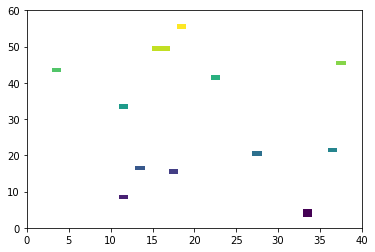

In [34]:
plt.pcolormesh(np.ma.array(holo_label,mask=holo_label<1))

In [48]:
com = np.array(center_of_mass(holo_ds["__xarray_dataarray_variable__"], holo_label, np.arange(1, 13)))


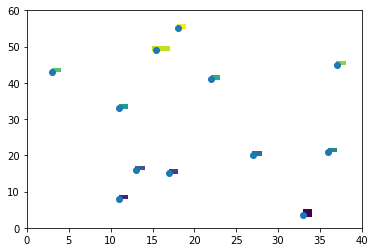

In [51]:
plt.pcolormesh(np.ma.array(holo_label,mask=holo_label<1))
plt.scatter(com[:,1], com[:, 0])

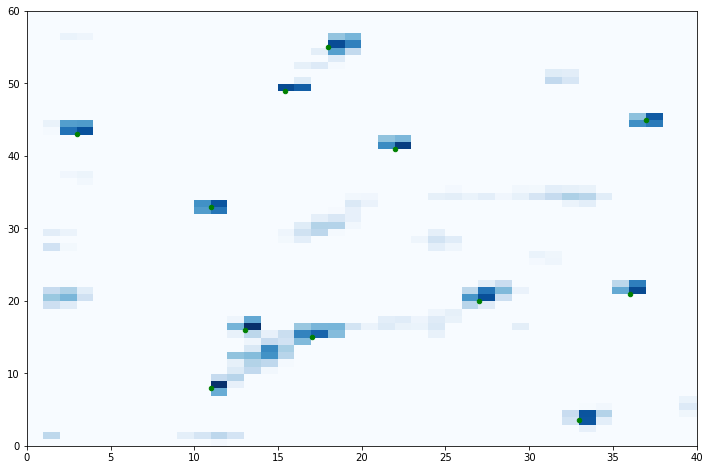

In [58]:
plt.figure(figsize=(12, 8))
plt.pcolormesh(np.log10(holo_ds["__xarray_dataarray_variable__"]), vmin=-2, cmap="Blues")
plt.scatter(com[:,1], com[:, 0], 20, "green")

In [63]:
threshes = np.arange(0.01, 0.55, 0.01)
label_counts = np.zeros(threshes.size, dtype=int)
for t, thresh in enumerate(threshes):
    holo_label, label_counts[t] = label(np.where(holo_ds["__xarray_dataarray_variable__"] >= thresh, 1, 0))

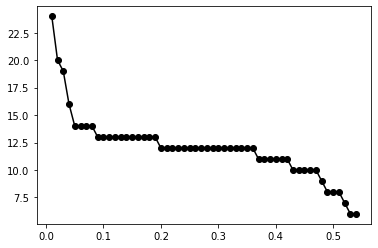

In [64]:
plt.plot(threshes, label_counts, 'ko-')